Цей проєкт присвячений аналізу даних велосипедного магазину. Мета — виявити основні тренди, сезонність у продажах, вподобання клієнтів за віком і статтю, а також зрозуміти, які товари приносять найбільший дохід. Отримані результати допоможуть краще планувати асортимент і маркетингові активності.  

**Зміст колонок**  

**Рік (Year)**: Ця колонка представляє рік, у якому відбулася транзакція.  
**Місяць (Month)**: Ця колонка представляє місяць, у якому відбулася транзакція.  
**Вік клієнта (Customer Age)**: Ця колонка представляє вік клієнта.  
**Стать клієнта (Customer Gender)**: Ця колонка представляє стать клієнта.   
**Країна (Country)**: Ця колонка представляє країну, у якій відбулася транзакція.   
**Штат (State)**: Ця колонка представляє штат, у якому відбулася транзакція.  
**Категорія продукту (Product Category)**: Ця колонка представляє широку категорію проданого товару.   
**Підкатегорія (Sub Category)**: Ця колонка представляє конкретну підкатегорію проданого товару.  
**Кількість (Quantity)**: Ця колонка представляє кількість проданого товару.    
**Собівартість одиниці (Unit Cost)**: Ця колонка представляє вартість виробництва або придбання однієї одиниці товару.    
**Ціна за одиницю (Unit Price)**: Ця колонка представляє ціну, за якою була продана одна одиниця товару.   
**Витрати (Cost)**: Ця колонка представляє загальні витрати на продані товари, які розраховуються як добуток кількості та собівартості одиниці.    
**Дохід (Revenue)**: Ця колонка представляє загальний дохід від продажів, який розраховується як добуток кількості та ціни за одиницю.   

# Завантаження бібліотек та набору даних

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, mannwhitneyu, chi2_contingency
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('salesforcourse-4fe2kehu.csv')
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


# Перевірка та очистка даних

In [6]:
# Огляд розміру даних
df.shape
print(f'Набір містить {df.shape[0]} та {df.shape[1]} колонок.')

Набір містить 34867 та 16 колонок.


In [7]:
# Огляд кількості пропущених значень та типу даних
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dtypes: float64(8), int64(1), object(7)
memor

In [8]:
# Видаляє колонку "Column1" з DataFrame
df.drop(columns=["Column1"], inplace=True)

# Видаляє всі рядки з пропущеними значеннями
df = df.dropna(axis=0)

# Скидає індекси після видалення рядків, не зберігаючи старий індекс
df.reset_index(drop=True, inplace=True)

# Переводить всі назви колонок у нижній регістр
df.columns = df.columns.str.lower()

# Перетворює колонку "date" у формат datetime
df.date = pd.to_datetime(df.date)

In [9]:
# Підрахунок кількості дубльованих рядків
df.duplicated().sum()

0

In [10]:
# Перевірка правильності розрахунку колонок cost та revenue
df_check1 = df[df['cost'] != df['quantity'] * df['unit cost']]
df_check2 = df[df['revenue'] != df['quantity'] * df['unit price']]
print(f'У стовпці cost {df_check1.shape[0]} позицій розраховані некоректно')
print(f'У стовпці revenue {df_check2.shape[0]} позицій розраховані некоректно')

У стовпці cost 6420 позицій розраховані некоректно
У стовпці revenue 7706 позицій розраховані некоректно


In [11]:
# Заміна неправильних розрахунків
df['cost'] = df['quantity'] * df['unit cost']
df['revenue'] = df['quantity'] * df['unit price']

In [12]:
# Описова статистика
df.describe()

,index,date,year,customer age,quantity,unit cost,unit price,cost,revenue
count,34866.000000,34866,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000
mean,17432.500000,2016-01-19 18:35:05.110996224,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004303,640.870074
min,0.000000,2015-01-01 00:00:00,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000
25%,8716.250000,2015-10-26 00:00:00,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000
50%,17432.500000,2016-01-28 00:00:00,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,318.999999
75%,26148.750000,2016-04-26 00:00:00,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000001
max,34865.000000,2016-07-31 00:00:00,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000
std,10065.091579,NaN,0.495190,11.112902,0.813936,490.015846,525.319091,690.500055,736.650597


Розподіл віку клієнтів: середній вік клієнтів 36 років, але є досить широкий діапазон (від 17 до 87 років).  
Продажі: більшість транзакцій включають 1-3 одиниці товару.  
Ціни товарів: є велика варіативність, від 0.67 до 5082 за одиницю товару, що може вказувати на різні типи товарів (дешеві аксесуари vs. дорогі велосипеди).   
Витрати та дохід: середній дохід на одну транзакцію 640.87, а середні витрати 576, що свідчить про прибутковість бізнесу.   

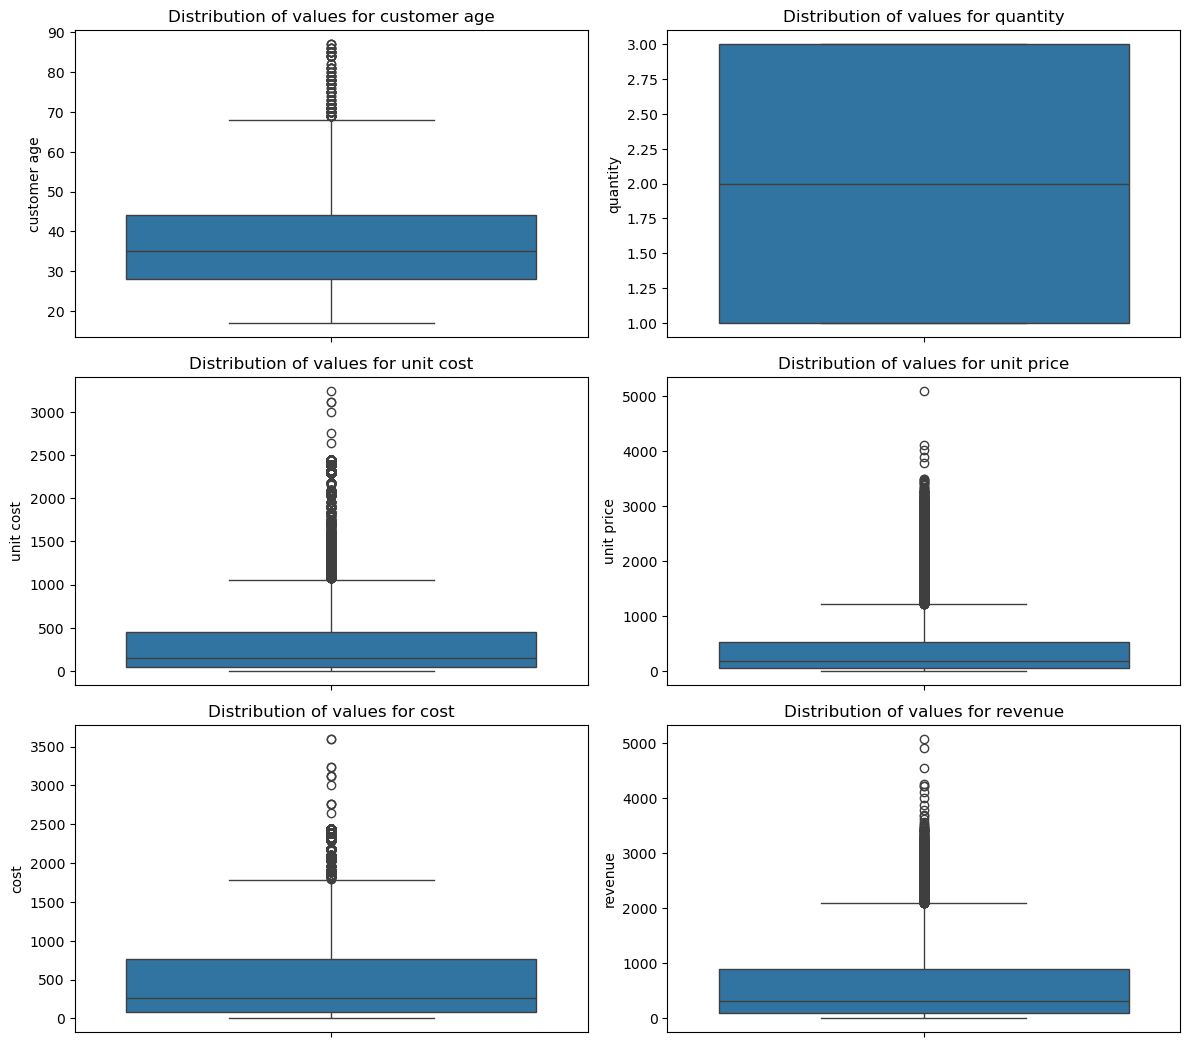

In [14]:
# Визначення колонок з числовим форматом даних
column_name = df.columns
column_numerical = [] 

for column in column_name:
    if df[column].dtype.name == 'float64' or df[column].dtype.name == 'int64':
        column_numerical.append(column)

# Побудова boxplot для визначення розподілу даних
plt.figure(figsize=(12, 14))    

for i,column in enumerate(column_numerical[2:8]):
    plt.subplot(round(len(column_numerical)/2), 2, i+1)
    sns.boxplot(df[column])
    plt.title(f'Distribution of values for {column}')

plt.tight_layout() 
plt.show();

Аналіз розподілу даних показує викиди для віку клієнта від 70 до 90 років. Це логічно, оскільки люди такого віку не є типовими покупцями велосипедів та аксесуарів до них. Ціна та дохід мають велику кількість викидів, які є типовими для цієї вибірки та свідчать про значну різницю в ціні між різними групами товарів (аксесуари, спортивний одяг та велосипеди).
Хоча колонки віку, ціни, доходу та витрат мають викиди, вони є типовими для цієї вибірки — всі дані залишаться для подальшого аналізу.

# Додаткові розрахунки 

In [17]:
# Створення нової колонки дати у форматі YYYY-MM
df['month year'] = df['date'].dt.to_period('M')

In [18]:
# Cтворення стовпця сезони року
def season(x):
    if x=='February' or x=='January' or x=='December':
        return 'Winter'
    if x=='March' or x=='April' or x=='May':
        return 'Spring'
    if x=='June' or x=='July' or x=='August':
        return 'Summer'
    if x=='September' or x=='October' or x=='November':
        return 'Autumn'

df['season'] = df.month.apply(season)

In [19]:
# Створення сегментів за ціною
min_price = df['unit price'].min()
price_25q = df['unit price'].quantile(0.25)
price_75q = df['unit price'].quantile(0.75)
max_price = df['unit price'].max()

def price_seg(x, min_price, price_25q, price_75q, max_price):
    if 0 < x <= price_25q:
        return 'low-price'
    elif x <= price_75q:
        return 'medium-price'
    elif x <= max_price:
        return 'high-price'

# Створення додаткового стовпця за сегментами ціни
df['price segment'] = df['unit price'].apply(
    lambda x: price_seg(x, min_price, price_25q, price_75q, max_price)
)

In [20]:
# Розбивка клієнтів на вікові групи
bins = [17,24,34,44,54,100]
labels = ['17-24', '25-34', '35-44', '45-54', '55+'] 
df['age group'] = pd.cut(df['customer age'], bins=bins, labels=labels, right=False)

In [21]:
# Створення нового стовпця з назвою дня тижня на основі дати покупки.
df['day of week'] = df['date'].dt.day_name()

In [22]:
# Розрахунок прибутку по категоріям товарів
df['profit'] = df['revenue'] - df['cost']

### 1.	Який є розподіл доходів та витрат за місяцями?

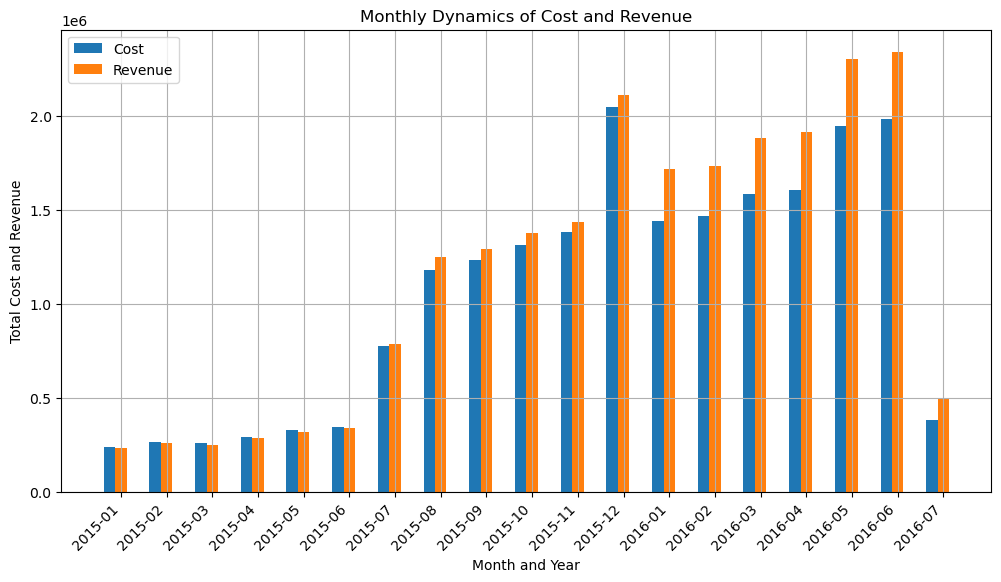

In [24]:
# Групування доходів та витрат за місяцем-роком
cost = df.groupby("month year")['cost'].sum()
revenue = df.groupby("month year")['revenue'].sum()

# Побудова графіка bar plot
ind = np.arange(len(cost.index))
width = 0.25

fig = plt.figure( figsize = (12, 6))
ax = plt.bar(ind, cost.values, width, label='Cost')
ax = plt.bar(ind+width, revenue.values, width, label='Revenue' )
plt.xlabel('Month and Year')
plt.ylabel('Total Cost and Revenue')
plt.title('Monthly Dynamics of Cost and Revenue')
plt.grid()

plt.xticks(ind+width, cost.index, rotation = 45,ha='right')
plt.legend()
plt.show();

In [25]:
# Визначення мінімальної та максимальної дати для липня 2016 року
df[df['date'].dt.to_period('M') == '2016-07']['date'].min(), df[df['date'].dt.to_period('M') == '2016-07']['date'].max()

(Timestamp('2016-07-01 00:00:00'), Timestamp('2016-07-31 00:00:00'))

Спостерігається незначний негативний прибуток у першій половині 2015 року. З липня 2015 року видно різке зростання, яке досягає піку в грудні 2015 року (ймовірно, спричинене різдвяними покупками). У 2016 році спостерігається суттєве збільшення доходів порівняно з витратами, що може свідчити про зростання продажів прибутковіших товарів. Різкий спад у липні 2016 року може бути викликаний як реальним падінням продажів, так і нестачею даних за цей період.

# 2.	Чи спостерігається сезонність у продажах окремих категорій товарів?

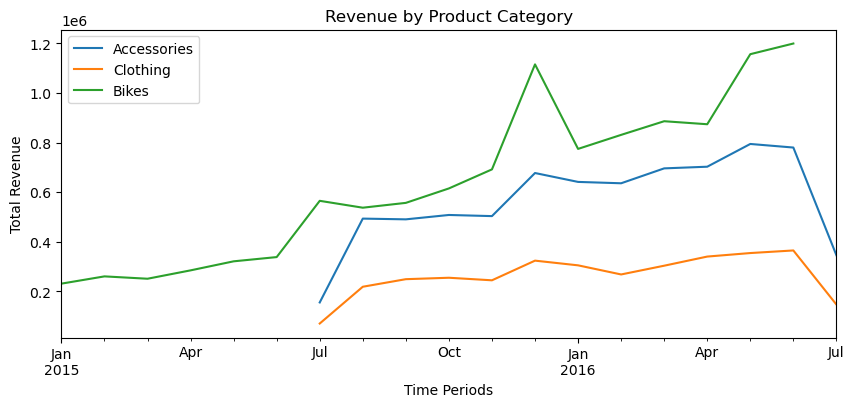

In [28]:
# Групування доходу за категорією товару та місяцем
category_revenue = df.groupby(['product category','month year'])['revenue'].sum()

# Отримання унікальних категорій товарів
unique_category = df['product category'].unique()

# Побудова лінійного графіка для кожної категорії товару
plt.figure(figsize=(10,4))

for category in unique_category:
    subset = category_revenue.loc[category]
    subset.plot(kind='line', label = category)
    plt.legend()


plt.xlabel('Time Periods')
plt.ylabel('Total Revenue')
plt.title('Revenue by Product Category')
plt.show();

Найбільший дохід приносить категорія велосипедів (це логічно, оскільки вони дорожчі за одяг та аксесуари). Аксесуари займають вагому частку доходу компанії за рахунок їх великої кількості продажів, а не високої ціни. Одяг приносить найменший дохід компанії.

Аналізуючи графік, можна побачити, що до липня 2015 року мережа магазинів продавала тільки велосипеди. У липні асортимент товарів розширився — з'явилися аксесуари та одяг для велоспорту.

Спостерігається найбільший вплив сезонності на групу товарів «Велосипеди» — видно стрибок продажів у грудні (покупка подарунків) та стрімке зростання у квітні. Це логічно, оскільки використання велосипедів збігається з теплими днями. Аксесуари мають схожий тренд впливу сезонності, але не такий виражений, як у велосипедів. У категорії «Одяг» зовсім відсутня сезонність.


Відсутність даних про дохід у категорії «Велосипеди» та різкий спад продажів у категоріях «Аксесуари» та «Одяг» підтверджують теорію про нестачу даних за цей період. Щоб уникнути викривлення аналізу, видалимо дані за липень 2016 року.

In [31]:
df = df[~((df['year'] == 2016) & (df['month'] == 'July'))]

# 3.	Який рівень доходу спостерігається у різних країнах у розрізі місяців?

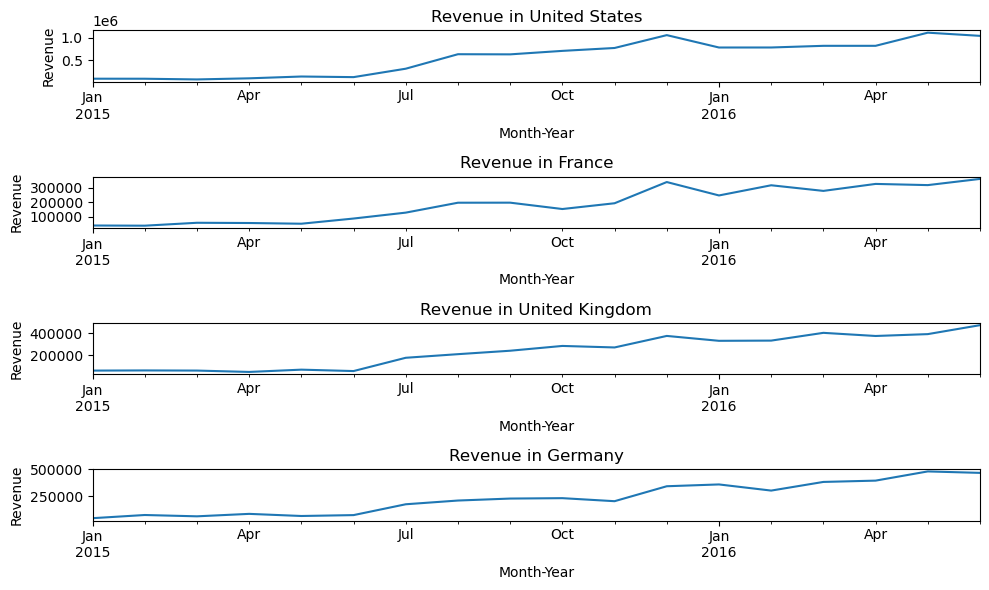

In [33]:
# Побудова окремих графіків зміни доходу за періодами для кожної країни
group_country = df.groupby(['country','month year'])['revenue'].sum()
countries = df['country'].unique()

plt.figure(figsize=(10,6))

for i,country in enumerate(countries):
    plt.subplot(len(countries),1,i+1)
    group_country.loc[country].plot(kind='line')
    plt.title(f'Revenue in {country}')
    plt.xlabel('Month-Year')
    plt.ylabel('Revenue')


plt.tight_layout() 
plt.show();

In [34]:
# Агрегація доходу за країнами: сума, середнє значення та частка від загального доходу
df.groupby('country')['revenue'].agg(
    revenue_sum = ('sum'),
    revenue_mean = ('mean'),
    revenue_percent = (lambda x: x.sum()/df['revenue'].sum()*100)
).round(2)

,revenue_sum,revenue_mean,revenue_percent
country,,,
France,3382506.0,677.59,15.48
Germany,4156390.0,825.34,19.02
United Kingdom,4196679.0,674.27,19.20
United States,10117389.0,583.91,46.30


Найбільший дохід компанії надходить із США — майже половина від загального обсягу виручки. Велика Британія та Німеччина мають схожі показники, займаючи друге місце за доходом, при цьому Німеччина демонструє найвищий середній чек. Франція генерує найменшу частку доходу серед чотирьох країн і має найменш виражену сезонність. У всіх країнах простежується позитивна динаміка зростання доходу впродовж аналізованого періоду.

# 4.1	Які товари мають найвищий середній чек та найбільшу популярність?

In [37]:
# Визначення товарів з найбільшим середнім чеком та найбільшою популярністю
pivot_table_average_сheck = df.pivot_table(
    values='revenue', 
    index=['product category', 'sub category'], 
    aggfunc='mean'
).sort_values(by='revenue', ascending=False).round(2)

pivot_table_quantity = df.pivot_table(
    values='quantity', 
    index=['product category', 'sub category'], 
    aggfunc='count'
).sort_values(by='quantity', ascending=False).round(2)

display(pivot_table_average_сheck.head(5).style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))
display(pivot_table_quantity.head(5).style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))

# 4.2	Які товари мають найнижчий середній чек та найменшу популярність?

In [39]:
# Визначення товарів з найменшим середнім чеком та з найменшою популярністю
pivot_table_average_сheck = df.pivot_table(
    values='revenue', 
    index=['product category', 'sub category'], 
    aggfunc='mean'
).sort_values(by='revenue', ascending=True)

pivot_table_quantity = df.pivot_table(
    values='quantity', 
    index=['product category', 'sub category'], 
    aggfunc='count'
).sort_values(by='quantity', ascending=True)

display(pivot_table_average_сheck.head(5).style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))
display(pivot_table_quantity.head(5).style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))

Цікаве спостереження, що Tires and Tubes та Bottles and Cages мають найбільшу популярність, тобто ймовірніше за все, що клієнт зайде, щоб купити ці товари. Вони мають найнижчий середній чек: 134.27 та 258.3 відповідно. Рекомендація — використовувати ці товари разом з непопулярними товарами в промоакціях, оскільки популярність може привернути увагу до менш відомих продуктів.   
Bike Racks має один із найбільших середніх чеків, але дуже низьку популярність. Є сенс зменшити ціну та запустити кампанію про цінність та користь цього продукту.  
Велосипеди логічно мають високий середній чек, а Road Bikes та Mountain Bikes — високу популярність. 
Рекомендація поєднувати в промо та в акціях товари з низькою популярністю та низькою ціною з тим котрі мають високу популярність,  наприклад Socks та Tires and Tubes.

# 5.	Які категорії продуктів мають найбільший попит серед покупців в певний період часу?

In [42]:
# Cтворення зводної таблиці по категоріям товарів за середнім чеком
pivot_table_season = df.pivot_table(
    values='revenue',
    index='sub category',
    columns='season',
    aggfunc='mean'
)

display(pivot_table_season.style.background_gradient(cmap='Blues', axis=1).format("{:.2f}"))

season,Autumn,Spring,Summer,Winter
sub category,,,,
Bike Racks,nan,1107.56,1728.90,1385.67
Bike Stands,957.61,1150.75,993.74,1091.50
Bottles and Cages,123.41,140.41,135.79,135.01
Caps,160.17,175.10,168.26,169.74
Cleaners,146.17,159.79,154.30,151.99
Fenders,nan,420.83,436.20,445.71
Gloves,nan,486.69,493.65,450.82
Helmets,611.76,688.12,662.65,653.80
Hydration Packs,847.28,1090.40,1002.57,1102.80


Переважно для більшості товарів є сезонність із вираженим попитом весною, літом та взимку, окрім Vests. Цікаво, що є товари, такі як Fenders, Hydration Packs, Shorts, Tires and Tubes, які активно продаються взимку, хоча велоспорт зазвичай не асоціюється з зимовою активністю.  
Додатково треба провести дослідження на тему поведінки клієнтів у холодний сезон для більш точного планування маркетингових кампаній та стимулювати попит восени через маркетингові кампанії.

# 6.	Які категорії товарів є найбільш популярними у різних країнах?

In [45]:
# Створення зводних таблиць 
pivot_country_category = df.pivot_table(
    values='revenue', 
    index='country', 
    columns='product category', 
    aggfunc='mean'
)

pivot_country_sub_category = df.pivot_table(
    values='revenue', 
    index='country', 
    columns='sub category', 
    aggfunc='mean'
)

display(pivot_country_category.style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))
display(pivot_country_sub_category.style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))

product category,Accessories,Bikes,Clothing
country,,,
France,333.91,1625.52,663.42
Germany,399.13,1909.70,685.58
United Kingdom,327.49,1613.30,586.66
United States,310.11,1501.18,672.52


sub category,Bike Racks,Bike Stands,Bottles and Cages,Caps,Cleaners,Fenders,Gloves,Helmets,Hydration Packs,Jerseys,Mountain Bikes,Road Bikes,Shorts,Socks,Tires and Tubes,Touring Bikes,Vests
country,,,,,,,,,,,,,,,,,
France,916.31,1073.58,136.38,162.93,144.81,444.33,486.71,660.67,952.84,931.49,1859.28,1422.75,1243.08,179.69,257.76,1681.14,1332.20
Germany,1833.33,1237.20,157.91,196.67,176.29,488.92,543.14,796.71,1183.08,1073.21,2256.69,1602.06,1796.14,215.55,303.94,1981.92,1595.13
United Kingdom,1171.07,988.26,129.56,166.72,155.54,435.52,474.20,657.27,1108.34,925.12,1821.40,1375.92,1165.91,164.51,242.50,1780.73,1080.32
United States,1294.05,1017.43,129.09,160.25,149.39,417.97,465.70,606.54,979.83,867.02,1804.08,1060.93,1212.78,159.97,251.81,1747.73,1113.51


У Німеччині всі групи товарів мають найвищий середній чек, що свідчить про високий попит. Тому Німеччину варто використовувати як орієнтир для підвищення середнього чеку в інших країнах.

# 7.Чи відрізняється поведінка покупців в залежності від статі.

In [48]:
# Обчислення топ-3 найпопулярніших товарів для кожної статі покупця
top_products_per_sex = df.groupby('customer gender')['sub category']
top_products_per_sex.apply(lambda x:x.value_counts(normalize=True).nlargest(3)).round(3).unstack()

F,Tires and Tubes,Bottles and Cages,Helmets
customer gender,,,
F,0.313,0.153,0.121
M,0.311,0.153,0.119


In [49]:
# Обчислення топ-3 найнепопулярніших товарів для кожної статі покупця
worse_products_per_sex = df.groupby('customer gender')['sub category']
worse_products_per_sex.apply(lambda x:x.value_counts(normalize=True).nsmallest(3)).round(3).unstack()

F,Bike Racks,Bike Stands,Vests
customer gender,,,
F,0.003,0.005,0.009
M,0.003,0.004,0.009


In [50]:
# Аналіз різниці між купівельною спроможністю між чоловіками та жінками
average_quantity_m_f = df.groupby('customer gender')['unit price'].mean().round(3)
print(f'Cередне значення - {average_quantity_m_f}' )

Cередне значення - customer gender
F    395.410
M    395.007
Name: unit price, dtype: float64


In [51]:
# Перевірка на нормальний розподіл вибірки більше ніж 5000 
male_price = df[df['customer gender'] == 'M']['unit price']
female_price = df[df['customer gender'] == 'F']['unit price']

state_male, p_value_male = normaltest(male_price)
state_female, p_value_female = normaltest(female_price)

if p_value_male > 0.05:
    print(f'Розподіл нормальний (p-value = {p_value_male:.3f})')
else:
    print(f'Розподіл ненормальний (p-value = {p_value_male:.3f})')
    
if p_value_female > 0.05:
    print(f'Розподіл нормальний (p-value = {p_value_female:.3f})')
else:
    print(f'Розподіл ненормальний (p-value = {p_value_female:.3f})')

Розподіл ненормальний (p-value = 0.000)
Розподіл ненормальний (p-value = 0.000)


In [52]:
# Виконання непараметричного тесту Манна-Вітні для порівняння середніх чеків чоловіків і жінок
stat, p_value = mannwhitneyu(male_price, female_price)

if p_value > 0.05:
    print(f'Cередній чек чоловіків такий самий як і середній чек жінок (p_value = {p_value:.2f})')
else:
    print(f'Cередній чек чоловіків відрізняється від середнього чеку жінок(p_value = {p_value:.2f})')

Cередній чек чоловіків такий самий як і середній чек жінок (p_value = 0.33)


In [53]:
# Порівняння чи є різниця між споживчими вподобаннями між чоловіками та жінками. 
contingency_table = pd.crosstab(df['customer gender'], df['sub category'])
stattistic, p_value, dof, expected_freq = chi2_contingency(contingency_table)
if p_value>0.05:
    print(f'Не існує статистично значущої різниці між вподобаннями чоловіків та жінок - p_value {p_value:.3f}') 
else:
    print(f'Існує статистично значуща різниця між вподобаннями чоловіків та жінок - p_value {p_value:.3f}') 

Не існує статистично значущої різниці між вподобаннями чоловіків та жінок - p_value 0.079


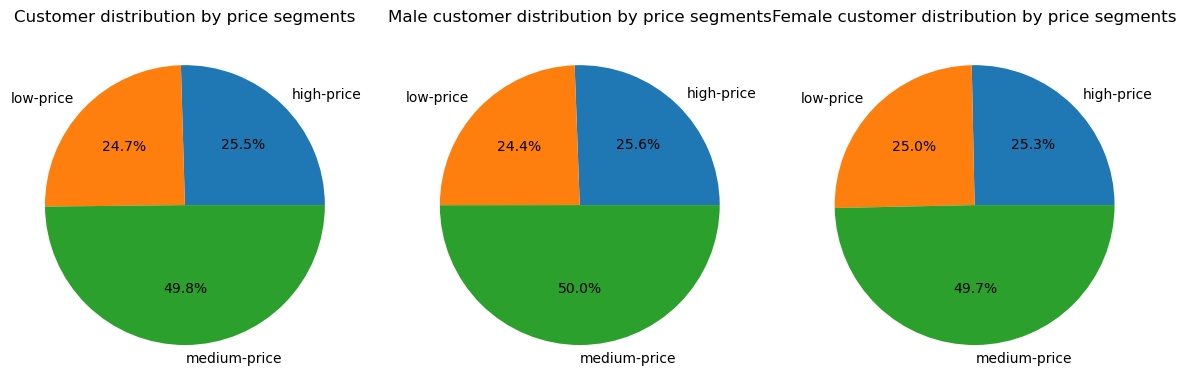

In [54]:
# Побудова графіків для визначення розподілу статті покупця за сегментами ціни
segment_price = df.groupby(['price segment'])['customer gender'].count()
segment_price_male = df[df['customer gender'] == 'M'].groupby('price segment')['customer gender'].count()
segment_price_female = df[df['customer gender'] == 'F'].groupby('price segment')['customer gender'].count()

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.pie(segment_price.values, labels = segment_price.index, autopct = '%1.1f%%')
plt.title('Customer distribution by price segments')

plt.subplot(1, 3, 2)
plt.pie(segment_price_male.values, labels = segment_price_male.index, autopct = '%1.1f%%')
plt.title('Male customer distribution by price segments')

plt.subplot(1, 3, 3)
plt.pie(segment_price_female.values, labels = segment_price_female.index, autopct = '%1.1f%%')
plt.title('Female customer distribution by price segments')

plt.tight_layout()
plt.show();


Взаголом немає статистичної значущомості  між споживчими вподобаннями чоловіків та жінок, але, розглянувши та порівняши купівельні звчики двух групп, зробивши тест Манна–Уітні видно що взгалом жінки купують більшу кількість продуктів ніж чоловіки, але ця різниця мінімальна, т.к. значення середнього та медіани між группами майже однакове.
Тобто наш типовий клієнт може бути як і жінкою, так і чоловіком. 

# 8.Чи відрізняється поведінка покупців в залежності від віку?

In [57]:
# Підрахунок доходу, середнього чеку та її частки в загальному доході за віковими групами
revenue_age_group = df.groupby('age group')['revenue'].agg(
    revenue_sum = ('sum'),
    revenue_mean = ('mean'),
    revenue_percent =( lambda x: x.sum() / df['revenue'].sum() * 100)
).round(2)

print(revenue_age_group)

           revenue_sum  revenue_mean  revenue_percent
age group                                            
17-24        1899698.0        472.21             8.69
25-34        7437943.0        678.33            34.04
35-44        7086943.0        704.89            32.43
45-54        3949446.0        662.21            18.07
55+          1478934.0        574.79             6.77


In [58]:
# Визначення топ-3 найпопулярніших товарів для кожної вікової групи клієнтів у відсотках
top_products_per_age = df.groupby('age group')['sub category'].apply(lambda x:x.value_counts(normalize = True).nlargest(3))
top_products_per_age.round(2).unstack()

17-24,Tires and Tubes,Bottles and Cages,Helmets
age group,,,
17-24,0.41,0.15,0.11
25-34,0.28,0.15,0.12
35-44,0.28,0.15,0.12
45-54,0.32,0.17,0.12
55+,0.38,0.14,0.11


In [59]:
# Визначення топ-3 найнепопулярніших товарів для кожної вікової групи клієнтів у відсотках
worse_products_per_age = df.groupby('age group')['sub category'].apply(lambda x:x.value_counts(normalize = True).nsmallest(3))
worse_products_per_age.round(2).unstack()

,Bike Racks,Bike Stands,Socks,Vests
age group,,,,
17-24,0.0,0.01,NaN,0.01
25-34,0.0,0.00,NaN,0.01
35-44,0.0,0.00,0.01,NaN
45-54,0.0,0.00,NaN,0.01
55+,0.0,0.01,NaN,0.01


In [60]:
# Обчислює розподіл категорій товарів за віковими групами та статтю покупця у відсотках
gender_age = df.groupby(['age group','customer gender'])['product category'].apply(lambda x:x.value_counts(normalize = True))
gender_age.unstack().round(2)

Accessories  Bikes  Clothing
age group customer gender                              
17-24     F                       0.72   0.12      0.16
          M                       0.72   0.12      0.16
25-34     F                       0.60   0.26      0.14
          M                       0.60   0.25      0.15
35-44     F                       0.61   0.24      0.15
          M                       0.62   0.23      0.15
45-54     F                       0.68   0.18      0.14
          M                       0.67   0.19      0.14
55+       F                       0.71   0.15      0.14
          M                       0.69   0.13      0.17

Порівнюючи купівельну спроможність між групами можно зробити висновок, що вікові группи 25-34 та 35-44 мають високу купівельну спроможність, котрі формують основний дохід компанії(66%). Група віком 45-54 мають середню купівельну спроможність(18%) та групи 17-24(8.69%) та 55+(6.77%) мають найменшу купівельну спроможність.   
Середній чек усього складає 640.87,можно зробити висновок що групи 25-34, 35-44, 45-54 відносяться до преміум-сегменту, т.к їх витрати вище ніж середній чек.Групи 17-24 та 55+ до не-преміум сегменту відповідно.  
Сфокусувати маркетинг на групах 25–44 років — вони дають 66% доходу та залучати 18–24 та 55+ через бюджетні акції та адаптовані комунікації.  
Популярні  та непопулярній товари є спільними для всіх вікових груп, що спрощує процес комунікації та виявлення потреб.

# 9.	Чи впливає день тижня на середній чек, і які товари є найбільш популярними у вихідні дні порівняно з буднями?

In [63]:
# Побудова зводної таблиці середнього чеку категорій товарі по дням тижня
pivot = df.pivot_table(
    values='revenue',
    index ='day of week',
    columns ='product category',
    aggfunc='mean',
    margins=True
)

display(pivot.style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))

product category,Accessories,Bikes,Clothing,All
day of week,,,,
Friday,323.63,1557.65,649.30,635.27
Monday,327.67,1566.96,667.33,639.94
Saturday,327.88,1675.15,650.73,661.91
Sunday,342.12,1621.05,626.92,652.75
Thursday,317.60,1613.73,659.11,637.05
Tuesday,329.28,1660.20,667.09,661.65
Wednesday,337.05,1637.83,679.70,666.40
All,329.38,1619.39,657.60,650.79


День тижня впливає на середній чек — найактивніший день тижня — середа.
Аксесуари найчастіше купують у неділю, а найменше — у вівторок. Рекомендується просувати аксесуари у вівторок через маркетингові кампанії.
Велосипеди найчастіше купують у суботу, а найменше — у пʼятницю.
Одяг найчастіше купують у середу, а найменше — у неділю. Рекомендується запускати промоакції на одяг саме в неділю.
Цікаво, що загалом немає неактивних днів — кожен день тижня має хоча б мінімальну активність. Це можна використати в маркетингових кампаніях: просувати менш популярні товари через приваблення іншими, які добре продаються в ці дні.

# 10.Які товари мають високу маржинальність, але невеликі обсяги продажів?

In [66]:
# Побудова зводної таблиці з прибутком та кількістю продажів
pivot_profit_revenue = df.pivot_table(
    index='sub category',
    values=['quantity', 'profit'],
    aggfunc={'profit':'mean', 'quantity':'sum'}
).sort_values(by='quantity', ascending=False)

display(pivot_profit_revenue.style.background_gradient(cmap='Blues', axis=0).format("{:.2f}"))

,profit,quantity
sub category,,
Tires and Tubes,45.50,20926.00
Bottles and Cages,24.41,10262.00
Helmets,123.42,8063.00
Road Bikes,32.49,6119.00
Mountain Bikes,52.84,5499.00
Jerseys,149.11,3875.00
Caps,28.57,2886.00
Touring Bikes,71.07,2673.00
Fenders,93.38,1385.00


Tires and Tubes та Bottles and Cages мають найвищі обсяги продажів, але низьку маржинальність.Переглянути цінову політику або асортимент для масових товарів із низьким прибутком.  
Bike Racks, Bike Stands, Vests і Hydration Packs мають високу маржинальність, але низькі обсяги продажів.Посилити просування високомаржинальних товарів із низьким обсягом продажів.